In [87]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
dta =sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0
#represents not 
dta['affair'] = (dta.affairs >
0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
print(X.head(10))
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)


   Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0        1.0                   1.0                   0.0   
1        1.0                   0.0                   1.0   
2        1.0                   0.0                   1.0   
3        1.0                   0.0                   0.0   
4        1.0                   0.0                   1.0   
5        1.0                   0.0                   1.0   
6        1.0                   0.0                   0.0   
7        1.0                   1.0                   0.0   
8        1.0                   0.0                   1.0   
9        1.0                   0.0                   1.0   

   C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   1.0          

In [88]:
print(dta.columns)
print(X.columns)


Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')
Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')


In [26]:
print(y)

[1. 1. 1. ... 0. 0. 0.]


In [37]:
from sklearn.linear_model import Lasso
features=X.columns
lasso=Lasso(alpha=0.1)
print(features)

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')


In [38]:
co=lasso.fit(X,y).coef_
print(co)

[ 0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.04293502
 -0.          0.01042355  0.         -0.         -0.        ]


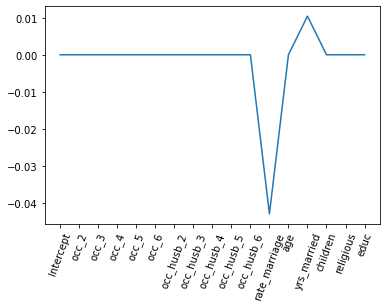

In [52]:
plt.plot(range(len(features)),co)
plt.xticks(range(len(features)),features,rotation=70)
plt.show()

From the above figure we come to know that yrs_married is the most important feature.


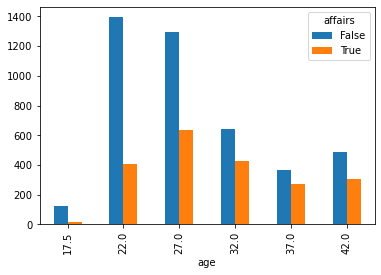

In [48]:
pd.crosstab([dta.age],dta.affairs.astype(bool)).plot(kind='bar')
plt.show()

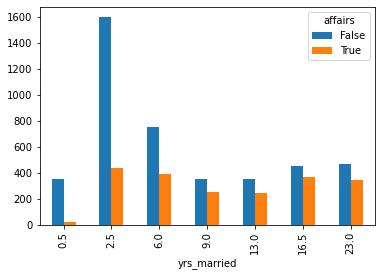

In [50]:
pd.crosstab([dta.yrs_married],dta.affairs.astype(bool)).plot(kind='bar')
plt.show()

In [89]:
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(y_pred)
print("Accuracy is ",logreg.score(x_test,y_test))
print(metrics.confusion_matrix(y_test, y_pred))

[1. 0. 0. ... 0. 0. 0.]
Accuracy is  0.7293193717277487
[[1171  115]
 [ 402  222]]


In [90]:
cv=cross_val_score(logreg,X,y,cv=5,scoring='accuracy')
print("Accuracy using cross val is",cv.mean())

Accuracy using cross val is 0.7238477939970478


In [91]:
prob=logreg.predict_proba(x_test)
prob

array([[0.44960176, 0.55039824],
       [0.73546232, 0.26453768],
       [0.62228822, 0.37771178],
       ...,
       [0.50474967, 0.49525033],
       [0.50696642, 0.49303358],
       [0.79229085, 0.20770915]])

In [92]:
print('Roc_Area under the curve score is',metrics.roc_auc_score(y_test, prob[:, 1]))


Roc_Area under the curve score is 0.7524019769111137
